In [3]:
from helpers import *

#sns.set_palette('colorblind')
sns.set_style('whitegrid')
sns.set_palette("colorblind")

mpl.rcParams["axes.titlesize"] = 15.
mpl.rcParams["axes.labelsize"] = 15.
mpl.rcParams["axes.titleweight"] = "bold"
mpl.rcParams["axes.labelweight"] = "normal"
mpl.rcParams['text.usetex'] = True
#mpl.rcParams['font.serif'] = ['cm']
mpl.rcParams['font.family'] = "serif"
#mpl.rcParams['font.serif'] = ['CMU']

# cm = 1/2.54  # centimeters in inches

## Parameter Effects

### Beta

Beta modulates how safe the training is, without affecting the performance, which is a huge plus. Unfortunately, we can't do this indefinitely, since betas higher than $\beta=1$ increase the variance too much, since a higher portion of the divergence will bcome from the noisy cost barrier divergence.

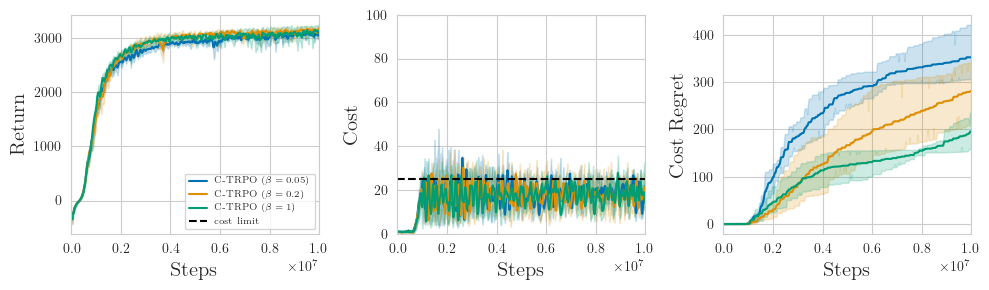

In [4]:
df = get_df(algo_subset = ("c-trpo-entropy", ),
            env_subset = ("SafetyAntVelocity-v1", ),
            experiments = ("c-trpo_beta_1", "c-trpo_beta_0_2", "c-trpo_beta_0_05" 
                           #, "c-trpo_beta_2"
                           ))

df = df.replace([
    "c-trpo-entropy (c-trpo_beta_1)", 
    "c-trpo-entropy (c-trpo_beta_0_2)", 
    "c-trpo-entropy (c-trpo_beta_0_05)"
], [r"C-TRPO ($\beta=1$)", r"C-TRPO ($\beta=0.2$)", r"C-TRPO ($\beta=0.05$)"])

axs = plot_env(df, "SafetyAntVelocity-v1", diagnostics=False)

plt.savefig(os.path.join("img", f"SafetyAntVelocity-v1_beta.pdf"), dpi=600)

### Cost Limit

The constraint violation is minimal, and the result is robust also for different cost limits. Interestingly, the performance is not even affected by the cost limit.

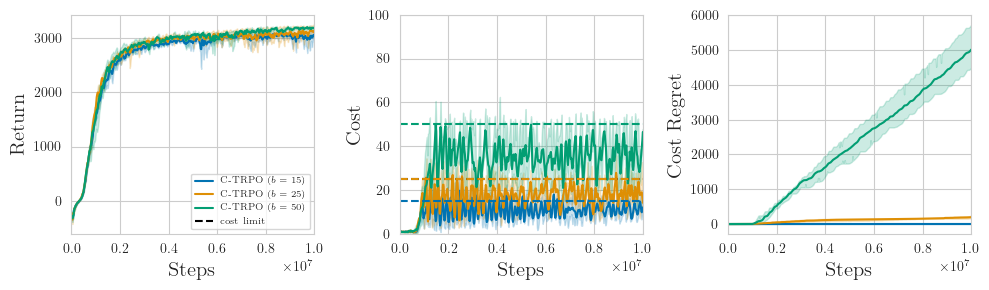

In [9]:
df = get_df(algo_subset = ("c-trpo-entropy", ),
            env_subset = ("SafetyAntVelocity-v1", ),
            experiments = ("c-trpo_beta_1", "c-trpo_limit_15", "c-trpo_limit_50"))

df = df.replace(["c-trpo-entropy (c-trpo_beta_1)", "c-trpo-entropy (c-trpo_limit_15)", "c-trpo-entropy (c-trpo_limit_50)"],
                [r"C-TRPO ($b=25$)", r"C-TRPO ($b=15$)", r"C-TRPO ($b=50$)"])
df = df.sort_values(by=["algo"])

axs = plot_env(df, "SafetyAntVelocity-v1", diagnostics=False, plot_cost_limit=False)

axs[1].plot([0, 10e6],[15,15], linestyle="dashed", label="limit", color=sns.color_palette()[0])
axs[1].plot([0, 10e6],[25,25], linestyle="dashed", label="limit", color=sns.color_palette()[1])
axs[1].plot([0, 10e6],[50,50], linestyle="dashed", label="limit", color=sns.color_palette()[2])

plt.savefig(os.path.join("img", f"SafetyAntVelocity-v1_cost_limit.pdf"), dpi=600)

### Cost Limit Hysteresis Fraction

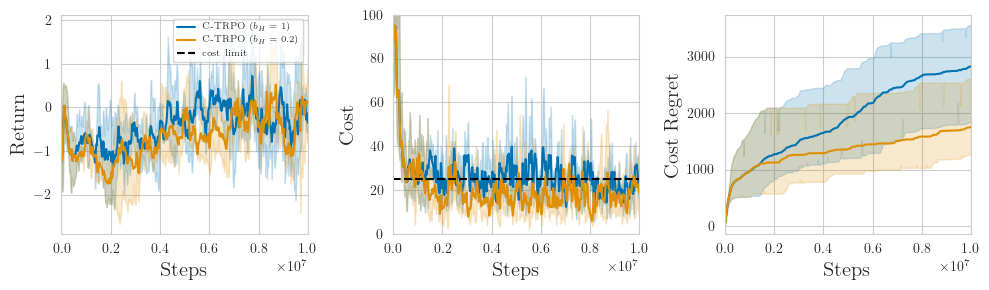

In [8]:
df = get_df(algo_subset = ("c-trpo-entropy", ),
            env_subset = ("SafetyCarButton1-v0", ),
            experiments = ("c-trpo_beta_1", "c-trpo_hyst_0_2"))

df = df.replace(["c-trpo-entropy (c-trpo_beta_1)", "c-trpo-entropy (c-trpo_hyst_0_2)"],
                [r"C-TRPO ($b_{H}=1$)", r"C-TRPO ($b_{H}=0.2$)"])

plot_env(df, "SafetyCarButton1-v0", diagnostics=False)

plt.savefig(os.path.join("img", f"SafetyAntVelocity-v1_hyst.pdf"), dpi=600)